In [1]:
import pydicom

In [2]:
address = '/mnt/new_ssd/projects/Anevrism/Data/brain_cta/Split'

In [3]:
cd /mnt/new_ssd/projects/Anevrism/Data/brain_cta/Split

/mnt/new_ssd/projects/Anevrism/Data/brain_cta/Split


In [4]:
!find . -type f ! -name "*.*" > output.txt

In [4]:
import matplotlib.pyplot as plt
from pathlib import Path
thickness = []
items = Path('output.txt').read_text().split('\n')


In [6]:
thickness = []
error_count = 0
not_available = 0
for i,item in enumerate(items):
    try:
        dicom=pydicom.dcmread(item,stop_before_pixels=True)
        if 'SliceThickness' in dicom:
            thickness.append(float(dicom.SliceThickness))
        else:
            not_available += 1 
    except:
        error_count += 1

(array([1.43844e+05, 1.26830e+05, 2.67800e+03, 1.50139e+05, 7.20400e+03,
        0.00000e+00, 2.50000e+01, 1.18030e+04, 0.00000e+00, 0.00000e+00,
        2.33700e+03, 0.00000e+00, 2.15000e+02, 0.00000e+00, 6.00000e+01,
        4.53000e+02, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 4.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 4.34000e+02]),
 array([ 0.        ,  0.66666667,  1.33333333,  2.        ,  2.66666667,
         3.33333333,  4.        ,  4.66666667,  5.33333333,  6.        ,
         6.66666667,  7.33333333,  8.        ,  8.66666667,  9.33333333,
        10.        , 10.66666667, 11.33333333, 12.        , 12.66666667,
        13.33333333, 14.        , 14.66666667, 15.33333333, 16.        ,
        16.66666667, 17.33333333, 18.        , 18.66666667, 19.33333333,
        20.        ]),
 <BarContainer object of 30 artists>)

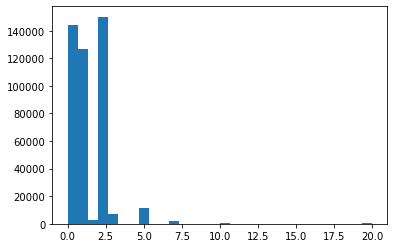

In [7]:
plt.hist(thickness,bins=30)

In [8]:
error_count

20

In [9]:
not_available

75109

In [10]:
available = 0
not_available = 0 
error_count =0
for i,item in enumerate(items):
    try:
        dicom=pydicom.dcmread(item,stop_before_pixels=True)
        if 'SliceLocation' in dicom:
            available += 1
        else:
            not_available += 1 
    except:
        error_count += 1
print(f'available: {available} not available:{not_available} errors:{error_count}')

available: 438239 not available:82896 errors:20


In [5]:
available = 0
not_available = 0 
error_count =0
for i,item in enumerate(items):
    try:
        dicom=pydicom.dcmread(item,stop_before_pixels=True)
        if 'SliceLocation' in dicom or 'SliceThickness' in dicom:
            available += 1
        else:
            not_available += 1 
    except:
        error_count += 1
print(f'available: {available} not available:{not_available} errors:{error_count}')

available: 446026 not available:75109 errors:20
